EDA - Seasonal pattern

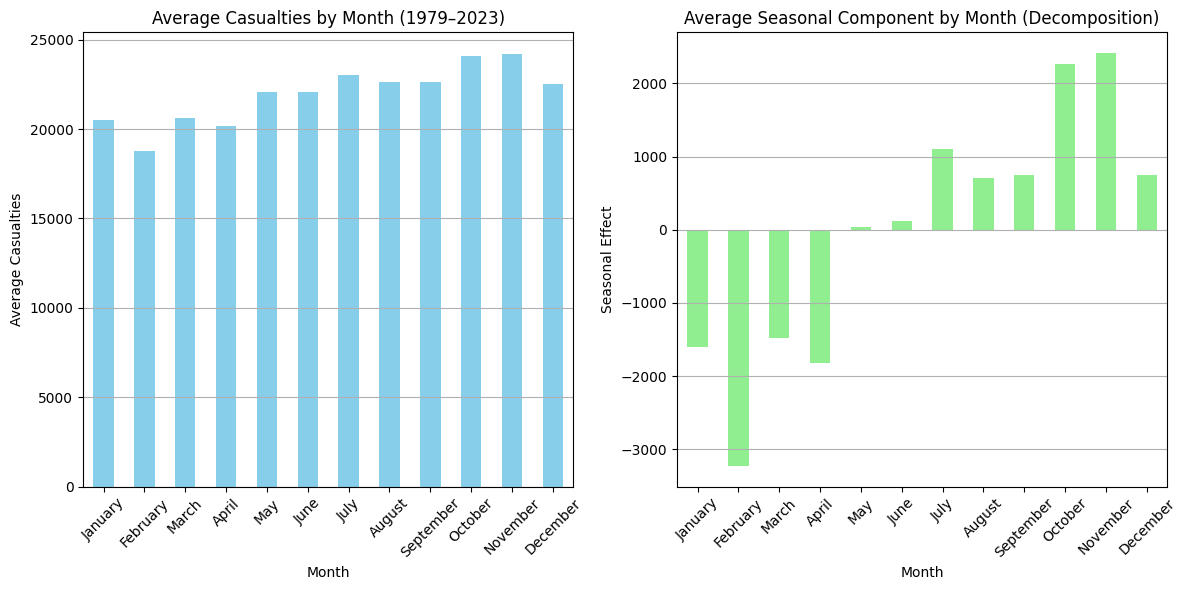


Average Casualties by Month (1979–2023):
Month
January      20486.49
February     18791.02
March        20593.56
April        20189.78
May          22057.24
June         22059.24
July         23032.13
August       22605.69
September    22625.09
October      24084.80
November     24201.80
December     22516.89
Name: Total Casualties, dtype: float64

Average Seasonal Component by Month (Decomposition):
Month
January     -1601.15
February    -3229.01
March       -1478.33
April       -1828.06
May            35.26
June          115.05
July         1103.56
August        711.10
September     746.45
October      2266.64
November     2416.80
December      741.71
Name: Seasonal, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Load the dataset
file_path = 'https://raw.githubusercontent.com/ThammakornS/DataForFun/refs/heads/main/casualties_per_month_long.csv'  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Ensure Month-Year is in datetime format
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%Y-%m')
df['Month'] = df['Month-Year'].dt.month_name()

# Method 1: Average casualties by month across all years
monthly_avg = df.groupby('Month')['Total Casualties'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Method 2: Time series decomposition
# Perform decomposition with a period of 12 (annual seasonality)
decomposition = seasonal_decompose(df['Total Casualties'], model='additive', period=12)

# Extract the seasonal component
seasonal = decomposition.seasonal
# Average the seasonal component by month
seasonal_df = pd.DataFrame({
    'Month-Year': df['Month-Year'],
    'Seasonal': seasonal,
    'Month': df['Month']
})
seasonal_monthly_avg = seasonal_df.groupby('Month')['Seasonal'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot the results
plt.figure(figsize=(12, 6))

# Plot average casualties by month
plt.subplot(1, 2, 1)
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Casualties by Month (1979–2023)')
plt.xlabel('Month')
plt.ylabel('Average Casualties')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Plot seasonal component by month
plt.subplot(1, 2, 2)
seasonal_monthly_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Seasonal Component by Month (Decomposition)')
plt.xlabel('Month')
plt.ylabel('Seasonal Effect')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Print the average casualties by month
print("\nAverage Casualties by Month (1979–2023):")
print(monthly_avg.round(2))

# Print the average seasonal component by month
print("\nAverage Seasonal Component by Month (Decomposition):")
print(seasonal_monthly_avg.round(2))

See specific year

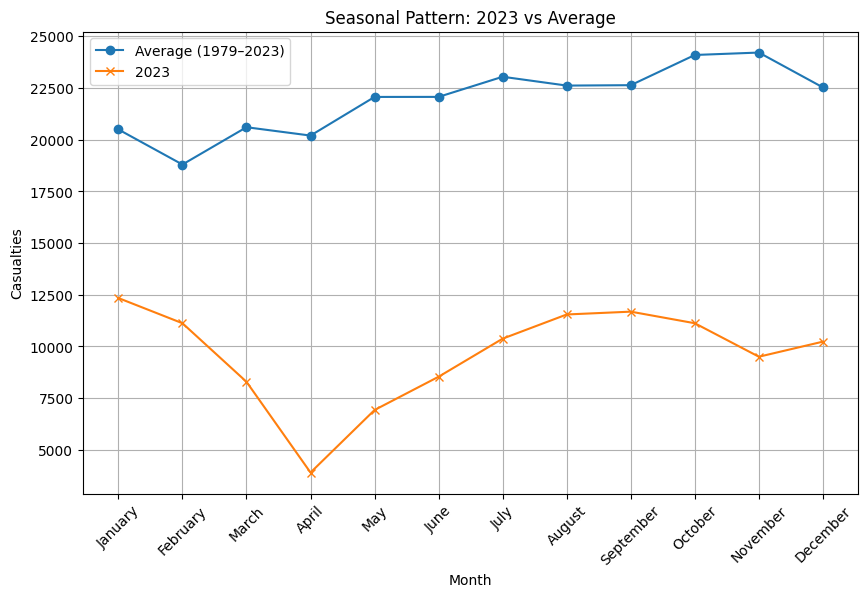

In [8]:
df_2023 = df[df['Month-Year'].dt.year == 2020]
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg, label='Average (1979–2023)', marker='o')
plt.plot(df_2023['Month'], df_2023['Total Casualties'], label='2023', marker='x')
plt.title('Seasonal Pattern: 2023 vs Average')
plt.xlabel('Month')
plt.ylabel('Casualties')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from scipy.stats import f_oneway
monthly_groups = [df[df['Month'] == month]['Total Casualties'] for month in monthly_avg.index]
f_stat, p_value = f_oneway(*monthly_groups)
print(f"ANOVA p-value: {p_value:.5f}")

ANOVA p-value: 0.00029


Test with Transformer:


🔍 Testing: window_size=4, blocks=1, embed_dim=2, heads=1, lr=0.001, dropout=0.05
✅ MAPE: 0.92978, R2: -0.00099

🔍 Testing: window_size=4, blocks=1, embed_dim=2, heads=1, lr=0.001, dropout=0.1
✅ MAPE: 0.84877, R2: 0.26895

🔍 Testing: window_size=4, blocks=1, embed_dim=4, heads=1, lr=0.001, dropout=0.05
✅ MAPE: 0.69180, R2: 0.38739

🔍 Testing: window_size=4, blocks=1, embed_dim=4, heads=1, lr=0.001, dropout=0.1
✅ MAPE: 0.89885, R2: 0.03657

🔍 Testing: window_size=4, blocks=1, embed_dim=8, heads=1, lr=0.001, dropout=0.05
✅ MAPE: 0.77450, R2: 0.28179

🔍 Testing: window_size=4, blocks=1, embed_dim=8, heads=1, lr=0.001, dropout=0.1
✅ MAPE: 0.59660, R2: 0.57675

🔍 Testing: window_size=4, blocks=3, embed_dim=2, heads=1, lr=0.001, dropout=0.05
✅ MAPE: 0.93071, R2: -0.00680

🔍 Testing: window_size=4, blocks=3, embed_dim=2, heads=1, lr=0.001, dropout=0.1
✅ MAPE: 0.92966, R2: -0.00168

🔍 Testing: window_size=4, blocks=3, embed_dim=4, heads=1, lr=0.001, dropout=0.05
✅ MAPE: 0.77771, R2: 0.33475

🔍

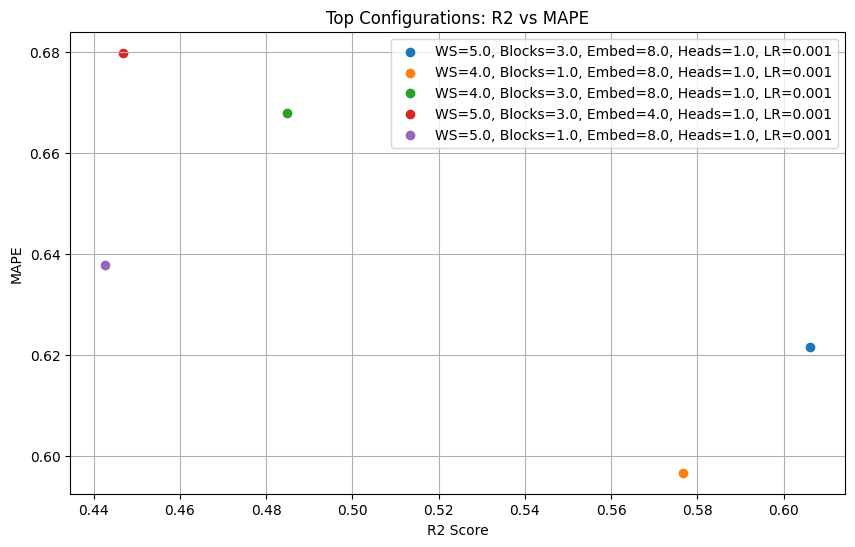

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import warnings
warnings.filterwarnings("ignore")

# Define MAPE metric
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Load and preprocess the dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    # Apply log transformation to Total Casualties
    # data = np.log1p(df['Total Casualties'].values.astype(float))
    data = df['Total Casualties'].values.astype(float)/100
    # Normalize the log-transformed data
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data.reshape(-1, 1)).flatten()
    # Extract month as a feature (1-12)
    df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%Y-%m')
    months = df['Month-Year'].dt.month.values
    # Normalize months to [0, 1]
    month_scaler = MinMaxScaler()
    months_normalized = month_scaler.fit_transform(months.reshape(-1, 1)).flatten()
    return data_normalized, months_normalized, scaler, month_scaler, data

# Prepare sequences for a given window size
def create_dataset(series, months, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        # Combine series and month features
        X.append(np.stack([series[i:i+window_size], months[i:i+window_size]], axis=-1))
        y.append(series[i+window_size])
    X = np.array(X)  # Shape: [samples, window_size, features]
    y = np.array(y)
    return X, y

# Transformer Block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation='relu'),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization()
        self.layernorm2 = layers.LayerNormalization()
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False, **kwargs):
        attn_output = self.att(inputs, inputs, training=training)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1, training=training)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

# Build Transformer model with LSTM
def build_model(input_shape, num_blocks, embed_dim, num_heads, ff_dim, dropout_rate):
    inputs = layers.Input(shape=input_shape)
    # Add LSTM layer
    x = layers.LSTM(32, return_sequences=True)(inputs)
    x = layers.Dense(embed_dim)(x)
    for _ in range(num_blocks):
        x = TransformerBlock(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, rate=dropout_rate)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(1)(x)
    return models.Model(inputs, x)

# Load the dataset
file_path = 'https://raw.githubusercontent.com/ThammakornS/DataForFun/refs/heads/main/casualties_per_month_long_year_norm.csv'  # Update with the correct path if needed
data_normalized, months_normalized, scaler, month_scaler, raw_data = load_data(file_path)

# Hyperparameter grid
# param_grid = {
#     'window_size': [2, 3, 4, 6],
#     'num_blocks': [1, 2],
#     'embed_dim': [8, 16, 32],
#     'num_heads': [1, 2],
#     'learning_rate': [0.001],
#     'dropout_rate': [0.1, 0.2]
# }

param_grid = {
    'window_size': [4, 5],
    'num_blocks': [1, 3],
    'embed_dim': [2, 4, 8],
    'num_heads': [1, 3],
    'learning_rate': [0.001],
    'dropout_rate': [0.05, 0.1]
}

results = []

# Grid search
for window_size, num_blocks, embed_dim, num_heads, lr, dropout_rate in product(
    param_grid['window_size'], param_grid['num_blocks'], param_grid['embed_dim'],
    param_grid['num_heads'], param_grid['learning_rate'], param_grid['dropout_rate']
):
    # Ensure embed_dim is divisible by num_heads
    if embed_dim % num_heads != 0:
        continue

    print(f"\n🔍 Testing: window_size={window_size}, blocks={num_blocks}, embed_dim={embed_dim}, heads={num_heads}, lr={lr}, dropout={dropout_rate}")

    # Prepare dataset
    # X, y = create_dataset(data_normalized, months_normalized, window_size)
    X, y = create_dataset(raw_data, months_normalized, window_size)

    # Split data: 2023 as test set
    total_samples = len(X)
    total_months = len(data_normalized)
    test_start_idx = total_months - 12  # 2023 starts at index 528
    test_indices = [i for i in range(total_samples) if i + window_size >= test_start_idx]
    train_val_indices = [i for i in range(total_samples) if i + window_size < test_start_idx]
    train_split = int(0.85 * len(train_val_indices))
    train_indices = train_val_indices[:train_split]
    val_indices = train_val_indices[train_split:]

    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    # Build and compile model
    model = build_model((window_size, 2), num_blocks, embed_dim, num_heads, 128, dropout_rate)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')

    # Callbacks: Early stopping and learning rate reduction
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    # Train model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0,
              validation_data=(X_val, y_val), callbacks=[early_stopping, lr_scheduler])

    # Evaluate on test set (2023)
    test_preds = model.predict(X_test, verbose=0).flatten()
    # Inverse transform predictions and true values
    test_preds_rescaled = np.expm1(scaler.inverse_transform(test_preds.reshape(-1, 1)).flatten())
    y_test_rescaled = np.expm1(scaler.inverse_transform(y_test.reshape(-1, 1)).flatten())

    # Compute metrics
    mse = mean_squared_error(y_test_rescaled, test_preds_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, test_preds_rescaled)
    r2 = r2_score(y_test_rescaled, test_preds_rescaled)

    results.append((window_size, num_blocks, embed_dim, num_heads, lr, dropout_rate, mse, mape, r2))
    print(f"✅ MAPE: {mape:.5f}, R2: {r2:.5f}")

# Results DataFrame
results_df = pd.DataFrame(results, columns=[
    'Window Size', 'Num Blocks', 'Embed Dim', 'Num Heads', 'Learning Rate', 'Dropout Rate', 'MSE', 'MAPE', 'R2'
]).sort_values(by='R2', ascending=False)
print("\nResults DataFrame (sorted by R2):")
print(results_df)

# Plot R2 for top configurations
top_configs = results_df.head(5)
plt.figure(figsize=(10, 6))
for idx, row in top_configs.iterrows():
    label = f"WS={row['Window Size']}, Blocks={row['Num Blocks']}, Embed={row['Embed Dim']}, Heads={row['Num Heads']}, LR={row['Learning Rate']}"
    plt.scatter(row['R2'], row['MAPE'], label=label)
plt.title("Top Configurations: R2 vs MAPE")
plt.xlabel("R2 Score")
plt.ylabel("MAPE")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# get result dataframe
results_df

,Window Size,Num Blocks,Embed Dim,Num Heads,Learning Rate,Dropout Rate,MSE,MAPE,R2
23,5,3,8,1,0.001,0.10,8.375168e-08,0.621570,0.606080
5,4,1,8,1,0.001,0.10,8.998696e-08,0.596602,0.576753
11,4,3,8,1,0.001,0.10,1.095351e-07,0.667898,0.484809
20,5,3,4,1,0.001,0.05,1.176189e-07,0.679768,0.446788
17,5,1,8,1,0.001,0.10,1.184803e-07,0.637688,0.442736
22,5,3,8,1,0.001,0.05,1.204393e-07,0.741544,0.433522
2,4,1,4,1,0.001,0.05,1.302475e-07,0.691798,0.387390
8,4,3,4,1,0.001,0.05,1.414404e-07,0.777707,0.334745
15,5,1,4,1,0.001,0.10,1.434611e-07,0.711854,0.325241
16,5,1,8,1,0.001,0.05,1.510398e-07,0.801214,0.289595


In [8]:
# Save the DataFrame to a CSV file in your Google Drive
results_df.to_csv('/content/drive/MyDrive/Monetize_Project/AdapT-Transformer/results_2.csv', index=False)
